In [1]:
import PIL.Image
import graphcat.notebook
import numpy
import skimage

import imagecat.notebook

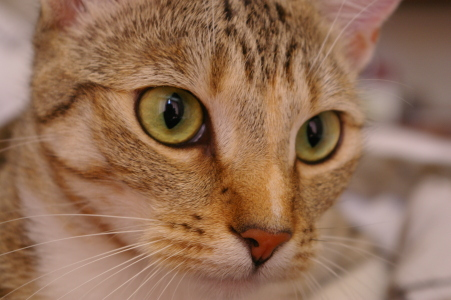

In [2]:
image = skimage.data.chelsea()
PIL.Image.fromarray(image)

In [3]:
image = skimage.img_as_float(image).astype(numpy.float16)
image = imagecat.Image({"C": imagecat.Layer(data=imagecat.color.srgb_to_linear(image), components=["r", "g", "b"], role=imagecat.Role.RGB)})

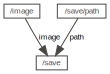

In [4]:
graph = graphcat.Graph()
graph.set_task("/image", graphcat.constant(image))
imagecat.add_operation(graph, "/save", imagecat.save, path="test.exr")
graph.add_links("/image", ("/save", "image"))

graphcat.notebook.display(graph)
graph.update("/save")

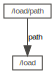


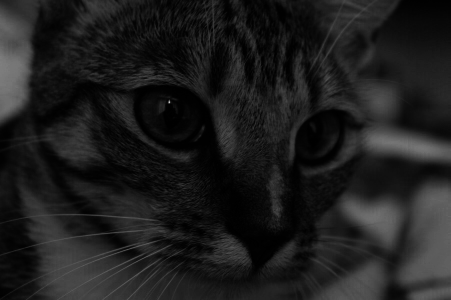
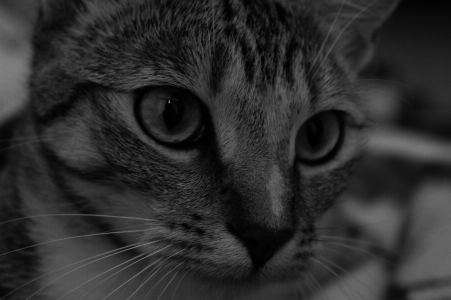
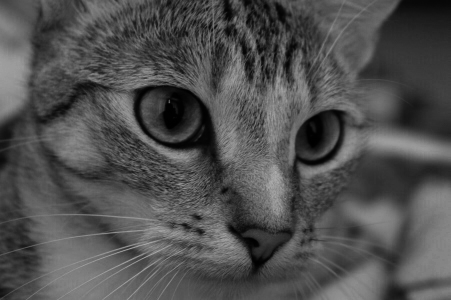

In [5]:
graph = graphcat.Graph()
imagecat.add_operation(graph, "/load", imagecat.load, path="test.exr")
graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output("/load"))